In [8]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder
import matplotlib.pyplot as plt

In [9]:
df=pd.read_csv("/content/personality_dataset.csv")

In [10]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [16]:
df.shape

(2900, 8)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [19]:
df.isnull().sum()

,0
Time_spent_Alone,0
Stage_fear,0
Social_event_attendance,0
Going_outside,0
Drained_after_socializing,0
Friends_circle_size,0
Post_frequency,0
Personality,0


In [18]:
df.dropna(inplace=True)

In [20]:
#all columns which aare object
df_obj=df.select_dtypes(include='object')

In [21]:
le=LabelEncoder()
for i in df_obj.columns:
  df[i]=le.fit_transform(df[i])


In [22]:
df

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,0,4.0,6.0,0,13.0,5.0,0
1,9.0,1,0.0,0.0,1,0.0,3.0,1
2,9.0,1,1.0,2.0,1,5.0,2.0,1
3,0.0,0,6.0,7.0,0,14.0,8.0,0
4,3.0,0,9.0,4.0,0,8.0,5.0,0
...,...,...,...,...,...,...,...,...
2892,9.0,1,2.0,0.0,1,1.0,2.0,1
2895,3.0,0,7.0,6.0,0,6.0,6.0,0
2896,3.0,0,8.0,3.0,0,14.0,9.0,0
2897,4.0,1,1.0,1.0,1,4.0,0.0,1


<Axes: xlabel='Going_outside', ylabel='Friends_circle_size'>

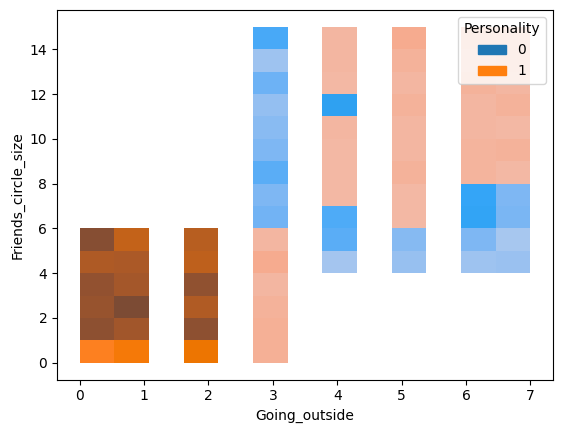

In [24]:
sns.histplot(x=df['Going_outside'],y=df['Friends_circle_size'],hue=df['Personality'])

In [25]:
x=df.drop(columns=['Personality'])
y=df['Personality']

In [30]:
xtr,xte,ytr,yte=train_test_split(x,y,test_size=0.2,random_state=42)

In [43]:
weak_l=DecisionTreeClassifier()


In [31]:
from sklearn.ensemble import AdaBoostClassifier

model=AdaBoostClassifier()
model.fit(xtr,ytr)

AdaBoostClassifier()

In [35]:
score=cross_val_score(model,x,y,cv=8)
print(score)
print('\n',np.mean(score))

[0.92580645 0.94193548 0.93225806 0.91935484 0.91935484 0.88673139
 0.89644013 0.90614887]

 0.9160037582211087


In [ ]:
#here we hgot accuuracy of 91 % withouthypertuning lets hypertune it and see what happens

In [45]:
model2=AdaBoostClassifier(estimator=weak_l,n_estimators=50,learning_rate=1)
model2.fit(xtr,ytr)

AdaBoostClassifier(estimator=DecisionTreeClassifier(), learning_rate=1)

In [47]:
score1=cross_val_score(model2,x,y,cv=8)
print(score1)
print('\n',np.mean(score1))

[0.90322581 0.9        0.88709677 0.85483871 0.86129032 0.85760518
 0.87378641 0.87055016]

 0.8760491700595051


In [ ]:
# lets tune it

In [67]:
model3=AdaBoostClassifier(estimator=weak_l,n_estimators=65,learning_rate=0.65)
model3.fit(xtr,ytr)

score2=cross_val_score(model3,x,y,cv=4)
print(score2)
print('\n',np.mean(score2))

[0.89516129 0.87399031 0.86914378 0.85621971]

 0.8736287716921153
